**Корректность проверена на Python 3.7:**
+ pandas 0.23.0
+ numpy 1.14.5
+ scipy 1.1.0

# Критерий согласия Пирсона ( $\chi^2$)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

In [2]:
import scipy
print(np.__version__)
print(pd.__version__)
print(scipy.__version__)

1.18.5
1.0.5
1.5.0


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


В этом видео мы потренируемся на практике применять критерии согласия Пирсона или критерий хи-квадрат. Напомню, что этот критерий используется для проверки того, что некоторая наблюдаемая случайная величина подчиняется тому или иному теоретическому закону распределения. 

Тренироваться мы будем на примере про исчерпанную рождаемость. Этот признак связан с количеством детей, родившихся у женщины на момент окончания репродуктивного возраста. Это приблизительно 45 лет. Для 1878 женщин старше 45, участвующих в социологическом опросе жителей Швейцарии, известно количество детей. Этот признак – типичный счётчик, поэтому его можно попробовать оценить с помощью распределения Пуассона. Таким образом, работать мы будем со следующей выборкой: это будет целочисленный вектор длины n, в данном случае длины 1878, где каждые компоненты вектора характеризуют количество детей, рожденных у женщины. В данном случае гипотеза H0 – это то, что наша наблюдаемая величина имеет распределение Пуассона.

## Исчерпанная рождаемость

Исчерпанная рождаемость — количество детей, родившихся у женщины на момент окончания конвенционального репродуктивного возраста (45 лет). Для 1878 женщин старше 45, участвовавших в социологическом опросе жителей Швейцарии, известно количество детей. Этот признак — типичный счётчик, а, значит, его можно попробовать описать распределением Пуассона.

* **выборка** - целочисленный вектор длиы $n$, характеризующий количество детей у опрашиваемой женщины
* **гипотеза $H_0$** - рассматриваемая величина имеет распределение Пуассона

Для начала давайте загрузим данные. Сделаем это с помощью функции open, и так как мы с вами заранее знаем, какого вида наши данные, давайте сразу отрежем от каждой строчки все нечитаемые символы и преобразуем tip в int. Делаем это с помощью простой комбинации функции map и λ. Вот так, готово. 

In [4]:
fin = open('fertility.txt', 'r')

In [7]:
data = list(map(lambda x: int(x.strip()), fin.readlines()))

Давайте посмотрим на данные. Мы видим, что, действительно, это просто список целых чисел. Давайте посмотрим на то, как наши данные распределены. Для того чтобы это сделать, нам нужно проссумировать сколько раз встречается каждое количество детей. Это очень легко сделать с помощью функции bincount из модуля NumPy. И построим график. Ну вот мы видим, что, в общем-то, количество детей меняется от 0 до 11. Чаще всего у женщины не более четырёх детей. Наиболее часто встречающееся количество детей – это два ребёнка. Кажется, что такие данные должны хорошо описываться распределением Пуассона.

In [9]:
data[:20]

[0, 0, 2, 0, 2, 3, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 3, 2, 2, 4]

In [15]:
np.bincount(data)

array([379, 262, 684, 353, 128,  35,  16,   8,  10,   1,   1,   1])

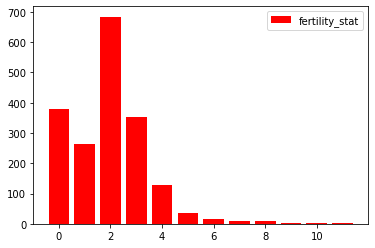

In [13]:
pylab.bar(range(12),
          np.bincount(data),
          color = 'red',
          label = 'fertility_stat')

pylab.legend()

In [16]:
import seaborn as sns; sns.set()

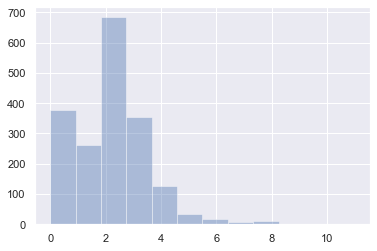

In [30]:
sns.distplot(data, bins = 12, kde=False)

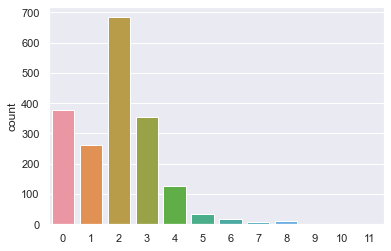

In [25]:
sns.countplot(x = data)

Давайте сразу оценим, какая λ должна быть в этом случае. Из предыдущих курсов вы помните, что лучшая оценка на параметр λ для распределения Пуассона, это просто выборочное среднее. Вот давайте его посчитаем и посмотрим, сколько же это. Получается приблизительно 2. Таким образом, давайте проверять следующую гипотезу. 

In [14]:
l = np.mean(data)
l

1.93716719914803

## Критерий согласия

Наша с вами наблюдаемая случайная величина имеет распределение Пуассона с λ = 2. Делать это будем с помощью критерия согласия Пирсона. Мы с вами захотим применить критерий хи-квадрат с помощью функции Chi-square из модуля stats библиотеки SciPy.

Для этого нам нужно будет подготовить данные. Первое, что нас будет интересовать, это наблюдённые частоты. В данном случае мы с вами знаем, сколько раз встретилось каждое количество детей в данных, поэтому давайте это рассчитаем. Это очень просто, мы уже сегодня применяли функцию bincount. Давайте это сделаем и сразу же увидим результат. Мы получили целочисленный вектор, где каждая компонента характеризует, сколько раз данное количество детей встретилось. То есть элемент вектора 0 говорит о том, сколько раз в нашей выборке встретилось количество детей, равное 0, в данном случае это 379, и последний 11 элемент означает, что 11 детей у нас встретилось всего лишь 1 раз. Это наблюдённые частоты.

In [31]:
observed_frequences = np.bincount(data)
observed_frequences

array([379, 262, 684, 353, 128,  35,  16,   8,  10,   1,   1,   1])

Теперь нам нужно построить так называемые ожидаемые частоты. Что же это такое? Если бы наши данные имели ровное распределение Пуассона с параметром λ2 и размер данных был бы таким же, сколько раз мы бы встретили каждое количество детей? Вот именно эту величину нам с вами нужно рассчитать. Это делается довольно просто. С помощью функции **pmf stats.poisson.pmf** мы можем с вами посчитать вероятность встретить некоторые значения, если данные распределены с распределением Пуассона. Давайте эти вероятности рассчитаем, они нас будут интересовать для значений от 0 до 11, а дальше просто умножим их на размер нашей выборки. Таким образом, мы получим то распределение, которое мы бы имели, если бы данные были порождены именно распределением Пуассона с оценённым нами параметром. Давайте это сделаем и посмотрим, какие же ожидаемые частоты мы бы получили.

In [32]:
expected_frequences = [len(data) * stats.poisson.pmf(x, l)
                       for x in range(min(data), max(data) + 1)]
expected_frequences

[270.6416065637888,
 524.2780429600978,
 507.80711402791167,
 327.9024282629646,
 158.80045713800124,
 61.52460735548975,
 19.863908551586047,
 5.49710172757265,
 1.3311006446292126,
 0.28650716750450117,
 0.055501228721053016,
 0.009774105435530582]

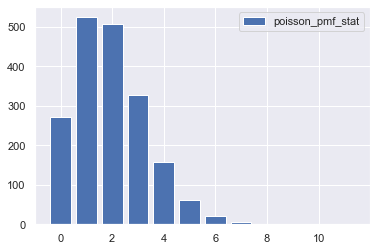

In [35]:
pylab.bar(range(12),
          expected_frequences,
          color = 'b',
          label = 'poisson_pmf_stat')

pylab.legend()

Видим, что они несколько отличаются от наблюдённых частот. В общем-то, какие-то, может быть, довольно близки. Вот теперь давайте посмотрим на то, как это выглядит, построим гистограмму наших наблюдённых частот, то есть то, что бы мы получили из распределения Пуассона. Интересно сравнить этот график с предыдущим. Давайте отмотаем назад. В общем-то, видим, что они значительно отличаются. 

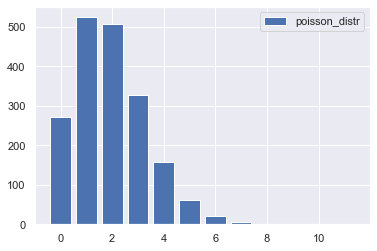

In [34]:
pylab.bar(range(len(expected_frequences)),
          expected_frequences,
          color = 'b',
          label = 'poisson_distr')
pylab.legend()

Статистика критерия хи-квадрат: $$\chi^2=\sum_{i=1}^K \frac{\left(n_i- np_i\right)^2}{np_i}$$
При справедливости нулевой гипотезы имеет распределение хи-квадрат с числом степеней свободы $K-1-m$, где $m$ - число параметров распределения, оцененных по выборке.

In [36]:
stats.chisquare(observed_frequences,
                expected_frequences,
                ddof = 1)

Power_divergenceResult(statistic=431.5752205284916, pvalue=1.772613180233512e-86)

дивергенция Результат

Теперь давайте это оценим строго с помощью критерия хи-квадрат. Вызываем функцию Chi-square, передаём ей наблюдённые частоты, ожидаемые частоты, и также важно указать параметры ddof, то есть difference of degrees of freedom. Это разница между степенями свободы. Дело в том, что мы с вами уже израсходовали одну степень свободы, когда оценивали параметр λ. Мы сделали это здесь, оценив его, как среднее по нашим данным, поэтому нам нужно сказать, что у нас теперь разница степеней свободны составляет 1, единичку мы уже потратили. Вот теперь давайте применим данный критерий и посмотрим. Во-первых, мы получили значение статистики, 431,5, и также значение p-value. Мы видим, что значение p-value – оно практически 0, очень маленькое число. Это значит, что мы можем смело отвергнуть гипотезу H0. То есть это означает, что наши данные не имеют распределения Пуассона с параметром l = почти 2. Итак, мы на этом заканчиваем. На этом видео мы научились на практике применять критерий хи-квадрат. А на следующим уроке вы поговорите про связь между проверкой гипотез и доверительными интервалами.